# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [10]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

units = "imperial"
base_url = "http://api.openweathermap.org/data/2.5/weather?"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [11]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"There were {len(cities)} cities queried.")

There were 606 cities queried.


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [12]:
weather_df = pd.DataFrame({
    "City Name":[],
    "Country":[],
    "Latitude":[],
    "Longitude":[],
    "Date":[],
    "Temperature":[], 
    "Humidity":[],
    "Wind Speed":[],
    "Clouds":[]
})

print("""
                             Beginning Data Retrieval
--------------------------------------------------------------------------------
""")
count = 1

for i in range(len(cities)):
    try:
        query_url = f"{base_url}appid={api_keys.api_key}&q={cities[i]}&units={units}"
        print(f"Processing Record {count} of Set 1 | {cities[i]}")
        
        response = requests.get(query_url)
        weather_json = response.json()
        
        cty_cloud = weather_json["clouds"]["all"]
        cty_cntry = weather_json["sys"]["country"]
        cty_date = time.strftime('%Y-%m-%d', time.localtime(weather_json["dt"]))
        cty_humid = weather_json["main"]["humidity"]
        cty_lat = weather_json["coord"]["lat"]
        cty_long = weather_json["coord"]["lat"]
        cty_mx_tmp = weather_json["main"]["temp_max"]
        cty_wndspd = weather_json["wind"]["speed"]
        
        weather_df = weather_df.append({
            "City Name":cities[i],
            "Country":cty_cntry,
            "Latitude":cty_lat,
            "Longitude":cty_long,
            "Date":cty_date,
            "Temperature":cty_mx_tmp, 
            "Humidity":cty_humid,
            "Wind Speed":cty_wndspd,
            "Clouds":cty_cloud
        }, ignore_index=True)
        count+=1
    except:
        print("Insufficient data. Skipping..")
print("""
--------------------------------------------------------------------------------
                                Data Retrieval Complete
--------------------------------------------------------------------------------
""")


                             Beginning Data Retrieval
--------------------------------------------------------------------------------

Processing Record 1 of Set 1 | rikitea
Processing Record 2 of Set 1 | chokurdakh
Processing Record 3 of Set 1 | nanortalik
Processing Record 4 of Set 1 | kapaa
Processing Record 5 of Set 1 | lebu
Processing Record 6 of Set 1 | bengkulu
Insufficient data. Skipping..
Processing Record 6 of Set 1 | praia da vitoria
Processing Record 7 of Set 1 | tucupita
Processing Record 8 of Set 1 | taolanaro
Insufficient data. Skipping..
Processing Record 8 of Set 1 | tiksi
Processing Record 9 of Set 1 | qaanaaq
Processing Record 10 of Set 1 | vanimo
Processing Record 11 of Set 1 | pacific grove
Processing Record 12 of Set 1 | port elizabeth
Processing Record 13 of Set 1 | pisco
Processing Record 14 of Set 1 | hilo
Processing Record 15 of Set 1 | labuhan
Processing Record 16 of Set 1 | bud
Processing Record 17 of Set 1 | nikolskoye
Processing Record 18 of Set 1 | pada

Insufficient data. Skipping..
Processing Record 168 of Set 1 | cockburn town
Processing Record 169 of Set 1 | jizan
Processing Record 170 of Set 1 | koshurnikovo
Processing Record 171 of Set 1 | santa isabel
Processing Record 172 of Set 1 | ust-nera
Processing Record 173 of Set 1 | mianyang
Processing Record 174 of Set 1 | avarua
Processing Record 175 of Set 1 | yerbogachen
Processing Record 176 of Set 1 | kaset sombun
Processing Record 177 of Set 1 | faya
Processing Record 178 of Set 1 | inverell
Processing Record 179 of Set 1 | parrita
Processing Record 180 of Set 1 | ksenyevka
Insufficient data. Skipping..
Processing Record 180 of Set 1 | maun
Processing Record 181 of Set 1 | ruatoria
Insufficient data. Skipping..
Processing Record 181 of Set 1 | vila velha
Processing Record 182 of Set 1 | tura
Processing Record 183 of Set 1 | broken hill
Processing Record 184 of Set 1 | stratford
Processing Record 185 of Set 1 | paciran
Processing Record 186 of Set 1 | ahipara
Processing Record 187

Processing Record 327 of Set 1 | karkaralinsk
Insufficient data. Skipping..
Processing Record 327 of Set 1 | akureyri
Processing Record 328 of Set 1 | todos santos
Processing Record 329 of Set 1 | ilulissat
Processing Record 330 of Set 1 | leshukonskoye
Processing Record 331 of Set 1 | waipawa
Processing Record 332 of Set 1 | khalkhal
Processing Record 333 of Set 1 | haapiti
Processing Record 334 of Set 1 | sao geraldo do araguaia
Processing Record 335 of Set 1 | wulanhaote
Insufficient data. Skipping..
Processing Record 335 of Set 1 | ekibastuz
Processing Record 336 of Set 1 | podgornoye
Processing Record 337 of Set 1 | kavaratti
Processing Record 338 of Set 1 | dingle
Processing Record 339 of Set 1 | bharatpur
Processing Record 340 of Set 1 | baoro
Processing Record 341 of Set 1 | ponta delgada
Processing Record 342 of Set 1 | pitesti
Processing Record 343 of Set 1 | novocheremshansk
Processing Record 344 of Set 1 | alpena
Processing Record 345 of Set 1 | bethel
Processing Record 346

Processing Record 495 of Set 1 | malakal
Insufficient data. Skipping..
Processing Record 495 of Set 1 | panguna
Processing Record 496 of Set 1 | usta muhammad
Processing Record 497 of Set 1 | port lincoln
Processing Record 498 of Set 1 | tsivilsk
Processing Record 499 of Set 1 | naron
Processing Record 500 of Set 1 | rocha
Processing Record 501 of Set 1 | pontes e lacerda
Processing Record 502 of Set 1 | montegrotto terme
Processing Record 503 of Set 1 | najran
Processing Record 504 of Set 1 | bubaque
Processing Record 505 of Set 1 | general teran
Processing Record 506 of Set 1 | baraboo
Processing Record 507 of Set 1 | ginda
Processing Record 508 of Set 1 | bergen
Insufficient data. Skipping..
Processing Record 508 of Set 1 | sao goncalo do amarante
Processing Record 509 of Set 1 | inongo
Processing Record 510 of Set 1 | lasa
Processing Record 511 of Set 1 | trinidad
Processing Record 512 of Set 1 | west bay
Processing Record 513 of Set 1 | mtwara
Processing Record 514 of Set 1 | leso

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [15]:

weather_df.to_csv("output_data_file")
weather_df.head(10)

,City Name,Country,Latitude,Longitude,Date,Temperature,Humidity,Wind Speed,Clouds
0,rikitea,PF,-23.12,-23.12,2019-01-04,76.98,100.0,20.29,100.0
1,chokurdakh,RU,70.62,70.62,2019-01-04,-8.75,66.0,3.29,64.0
2,nanortalik,GL,60.14,60.14,2019-01-04,28.56,93.0,25.88,88.0
3,kapaa,US,22.08,22.08,2019-01-04,75.02,64.0,19.46,75.0
4,lebu,ET,8.96,8.96,2019-01-04,57.20,35.0,11.41,0.0
5,praia da vitoria,PT,38.73,38.73,2019-01-04,60.80,87.0,17.49,75.0
6,tucupita,VE,9.06,9.06,2019-01-04,86.92,56.0,10.78,80.0
7,tiksi,RU,71.64,71.64,2019-01-04,-7.63,61.0,17.05,44.0
8,qaanaaq,GL,77.48,77.48,2019-01-04,-4.07,75.0,8.43,8.0
9,vanimo,PG,-2.67,-2.67,2019-01-04,83.10,100.0,21.63,68.0


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

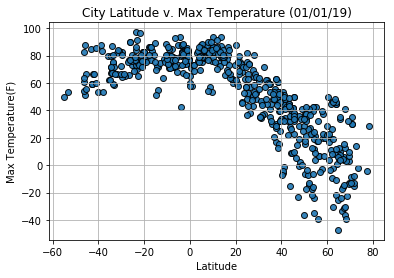

In [22]:
fig, ax = plt.subplots()
lat_v_temp = ax.scatter(
    weather_df["Latitude"],
    weather_df["Temperature"],
    alpha=0.9,
    edgecolor="black",   
)

ax.set_title("City Latitude v. Max Temperature (01/01/19)")
ax.set_ylabel("Max Temperature(F)")
ax.set_xlabel("Latitude")
ax.grid(b=None)

plt.savefig("images")

#### Latitude vs. Humidity Plot

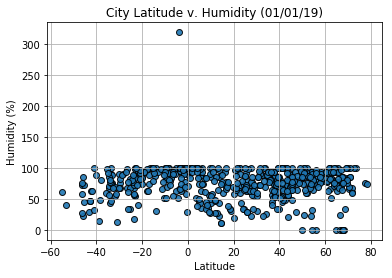

In [23]:
fig, ax = plt.subplots()
lat_v_humid = ax.scatter(
    weather_df["Latitude"],
    weather_df["Humidity"],
    alpha=0.9,
    edgecolor="black",   
)

ax.set_title("City Latitude v. Humidity (01/01/19)")
ax.set_ylabel("Humidity (%)")
ax.set_xlabel("Latitude")
ax.grid(b=None)

plt.savefig("images2")

#### Latitude vs. Cloudiness Plot

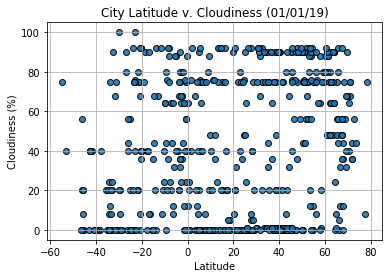

In [24]:

fig, ax = plt.subplots()
lat_v_cloud = ax.scatter(
    weather_df["Latitude"],
    weather_df["Clouds"],
    alpha=0.9,
    edgecolor="black",   
)

ax.set_title("City Latitude v. Cloudiness (01/01/19)")
ax.set_ylabel("Cloudiness (%)")
ax.set_xlabel("Latitude")
ax.grid(b=None)

plt.savefig("images3")

#### Latitude vs. Wind Speed Plot

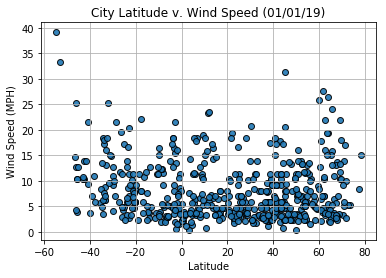

In [25]:
fig, ax = plt.subplots()
lat_v_cloud = ax.scatter(
    weather_df["Latitude"],
    weather_df["Wind Speed"],
    alpha=0.9,
    edgecolor="black",   
)

ax.set_title("City Latitude v. Wind Speed (01/01/19)")
ax.set_ylabel("Wind Speed (MPH)")
ax.set_xlabel("Latitude")
ax.grid(b=None)

plt.savefig("images4")